<a href="https://colab.research.google.com/github/Kanokphon001/-Convolution-Neural-Network-CNN-/blob/main/LAB_6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network (CNN)

![](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)


## Network Layers in Keras
### 1.  Convolutional layer
         tensorflow.keras.layers.Conv2D
### 2.  MaxPooling layer
         tensorflow.keras.layers.MaxPooling2D
### 3.  Flatten layer
         tensorflow.keras.layers.Flatten
### 4.  Dense layer
         tensorflow.keras.layers.Dense


## CIFAR-10 dataset
![](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

The CIFAR10 (Canadian Institute For Advanced Research) dataset consists of 10 classes with 6,000 color images of 32x32 resolution for each class. It is divided into 50,000 training and 10,000 testing images.


In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('train data: ', x_train.shape, y_train.shape)
print('test_data ' , y_test.shape, y_test.shape)

train data:  (50000, 32, 32, 3) (50000, 1)
test_data  (10000, 1) (10000, 1)


### Encode label into one-hot (binary) vector

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0                   ## normalize input values
x_test = x_test / 225.0

one_hot_y_train  = to_categorical(y_train)
one_hot_y_test  = to_categorical(y_test)



```
# This is formatted as code
```

#### Building a CNN Model using Keras

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(32 , (3, 3), input_shape=(32, 32, 3), activation='relu'))        ## add convolution layer with 3x3 32 filters
cnn.add(MaxPooling2D())                                                                         ## add maxpooling layer

cnn.add(Conv2D(64, (3, 3), activation='relu'))                                            ## add convolution layer with 5x5 64 filters
cnn.add(MaxPooling2D())                                                                         ## add maxpooling layer

cnn.add(Flatten())                                                     ## convert feature maps into a feature vector
cnn.add(Dense(128, activation='relu'))                                  ## add hidden layer
cnn.add(Dense(10, activation='softmax'))                               ## add output layer

print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#### Compile the Network

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = "sgd")       ## sgd = Stochastic Gradient Descent

#### Train the network

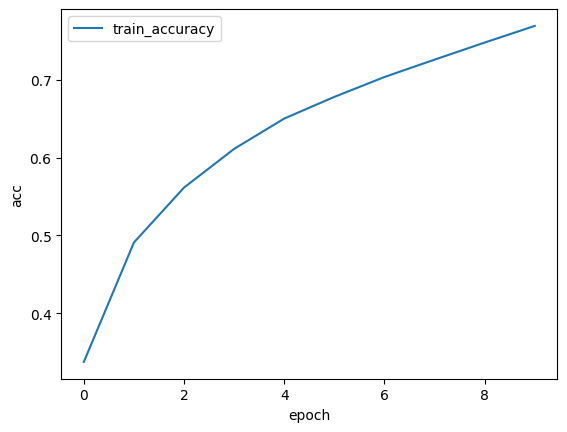

In [ ]:
import matplotlib.pyplot as plt

hist  = cnn.fit(x_train, one_hot_y_train,  epochs=10, verbose = 0)

plt.plot(hist.history['accuracy'])                                           ### plot performance
plt.legend(['train_accuracy'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc = cnn.evaluate(x_test, one_hot_y_test, verbose=0)

print(f"Accuracy: {acc[1]*100:.2f}")

Accuracy: 67.68


## Predicting the Result
Let's take 25 images from the testing data and see how many of it we predicted correctly.

In [ ]:
import numpy as np

test_images = x_test[:25]

pred = cnn.predict(test_images)
#print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)   # take max. of softmax values.
print(pred_classes)

1/1 [==============================] - 0s 17ms/step
[3 8 8 0 4 6 1 6 3 1 0 9 5 7 9 6 5 7 8 6 4 2 4 9 4]


## Plot results

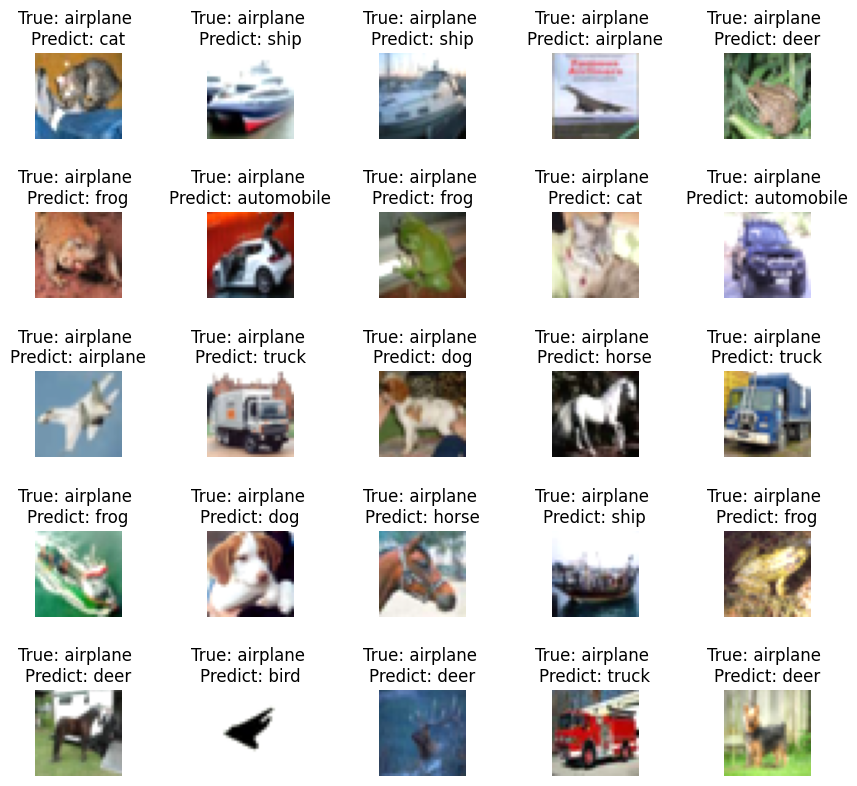

In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5, 5, figsize=(10,10))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Exercise 1
## 1. ทดลองสร้างโมเดล CNN LeNet-5 โดยกำหนดโครงสร้างตามภาพด้านล่าง จากนั้นทดลองฝึกฝนโมเดลเพื่อจำแนก label in CIFAR-10

![](https://miro.medium.com/max/4000/1*DMcPgeekUftwk0GTMcNawg.png)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.models import Sequential

lenet5 = Sequential()

lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

## 2. ทำการฝึกโมเดล LeNet-5 พร้อมพล๊อตกราฟแสดงค่า accuracy ที่ได้ในแต่ละรอบ กำหนด batch_size= 32 และ learning rate = 0.003 โดยเทรน 10 รอบ

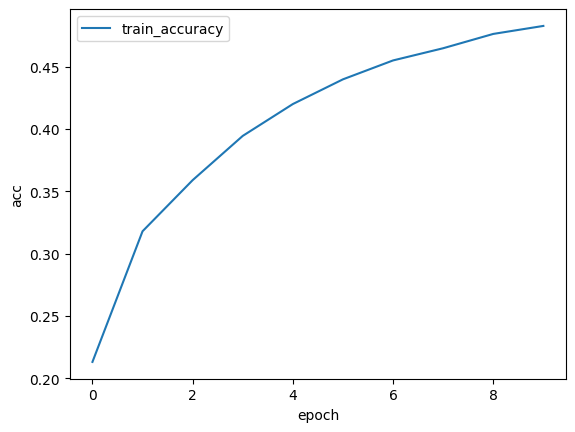

In [ ]:
from tensorflow.keras.optimizers import SGD



plt.plot(hist.history['accuracy'])                                           ### plot performance
plt.legend(['train_accuracy'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()


##3. แสดงผลการทดสอบค่า accuracy บนชุดข้อมูลทดสอบ (test data)

ValueError: ignored

##  Exercise 2
  พัฒนาโมเดล CNN สำหรับจำแนกภาพสุนัขและแมวจากชุดข้อมูล Cat&Dog  

![](https://blog.keras.io/img/imgclf/cats_and_dogs.png)

download this dataset
!git clone  https://github.com/vyomshm/Cats-Dogs-with-keras.git

In [ ]:
!git clone https://github.com/vyomshm/Cats-Dogs-with-keras.git

Cloning into 'Cats-Dogs-with-keras'...
remote: Enumerating objects: 2893, done.
remote: Counting objects: 100% (2893/2893), done.
remote: Compressing objects: 100% (2892/2892), done.
remote: Total 2893 (delta 0), reused 2893 (delta 0), pack-reused 0
Receiving objects: 100% (2893/2893), 62.53 MiB | 21.35 MiB/s, done.


## จัดการไฟล์ภาพด้วยไลบรารี่ OpenCV
OpenCV is a huge open-source library for computer vision, machine learning, and image processing.

> import cv2

>  cv2.imread(path_of_image_file)     อ่านไฟล์ภาพเข้ามาเก็บในรูปของ numpy array
>  cv2.resize(image, (height, width))  ปรับขนาดของไฟล์ภาพ

ref: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

(144, 175, 3)


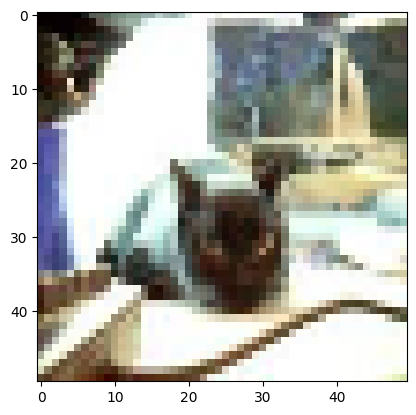

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Cats-Dogs-with-keras/data/train/cats/cat.5.jpg')
print(img.shape)

img = cv2.resize(img, (50, 50))

plt.imshow(img)

## อ่านไฟล์ภาพทั้งหมดจากไดเรกทรอรี่ 'cats' และ 'dogs' เพื่อนำไปสร้างชุดข้อมูล train และ test สำหรับ CNN กำหนดขนาดไฟล์ภาพให้เป็น 100*100 เท่ากัน

In [ ]:
import cv2
import glob                              ## glob library for read files

def load_images(path, img_size=100):
    images = []                    ## list of images
    labels = []                    ## list of labels

    files = glob.glob(path + '/**/*.jpg', recursive = True)      ## use glob to read all files in a directory and its subdirectories
    for file in files:
        img = cv2.imread(file)                                  ## read image
        img = cv2.resize(img, (img_size, img_size))             ## resize image
        images.append(img)
        labels.append(file.split('/')[5])

    images = np.array(images)/255.0                             ## normalize images
    return images, labels                                       ## return images and labels

x_train, y_train = load_images('/content/Cats-Dogs-with-keras/data/train', 100)
x_test, y_test = load_images('/content/Cats-Dogs-with-keras/data/validation', 100)

print(x_train.shape, x_test.shape)

(2048, 100, 100, 3) (832, 100, 100, 3)


## Convert the lables into one_hot_vector

## 2. ออกแบบ CNN เพื่อจำแนกภาพ 'dog' และ 'cat'
###โดยให้
###layer 1 convolutional layer 3x3 ขนาด 32 filters, activation = relu พร้อมเติม padding
###layer 2 maxpooling  3x3 ขนาด 32 filters
###layer 3 Flatten
###layer 4 fully connected layer = 100  activation = relu
###layer 5 output layer

###กำหนดให้ learning rate = 0.0005 และ batch_size = 64
###ฝึกโมเดล cnn พร้อมแสดงกราฟ accuracy อย่างน้อย 100 รอบ

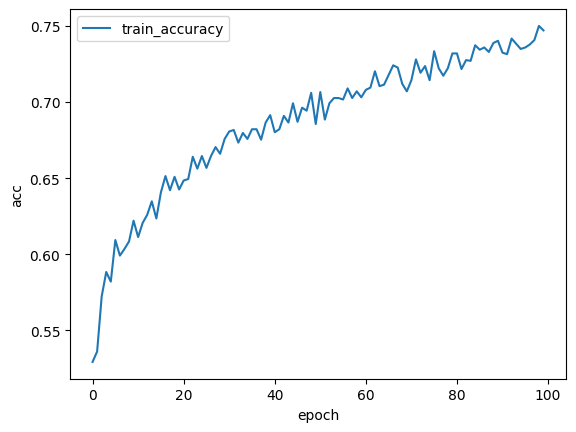

## 3. แสดงค่า accuracy บนชุดข้อมูล test  

26/26 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.6358
Accuracy: 63.58


## 4. ทดลองโหลดภาพสุนัขและแมวจากอินเทอร์เน็ต จากนั้นใช้โมเดล cnn เพื่อทำนายลาเบลของภาพ

1/1 [==============================] - 0s 19ms/step
[1 1]


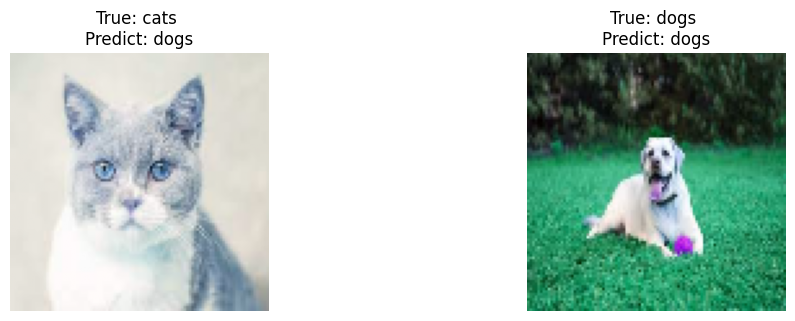